In [80]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

# Apertura de archivos

In [81]:
file_names = ['209_101_24_JPG.rf.865089eccbc0c33accfc32623ac046ed',
            '209_205_50_JPG.rf.949b5aa6fdbf6a1f721c39ed5ddcebec',
            '209_310_37_JPG.rf.fc1bab0d312b2f3ded60d51f809b6a2d',
            '209_413_15_JPG.rf.94b7dd36f092b97bcb604cfdddfe3fc0',
            '503_118_29_JPG.rf.33b1e23ce2d5d55c753d42f7fae09523',
            '503_222_19_JPG.rf.d34e87d9c5dbe27a14ef87f2ca66f883']

print("Indexes: 0 -",len(file_names)-1)

Indexes: 0 - 5


In [82]:
file_name = file_names[5]
labels_file = f'./Labels/3.5m.v2i.yolov8/train/labels/{file_name}.txt'
image_file = f'./Labels/3.5m.v2i.yolov8/train/images/{file_name}.jpg'
file_name

'503_222_19_JPG.rf.d34e87d9c5dbe27a14ef87f2ca66f883'

In [83]:
with open(labels_file, 'r') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]
    labels = [line.split() for line in lines]

In [84]:
# Convierte de string a int/float
labels = [[int(value) if i == 0 else float(value) 
          for i, value in enumerate(label)] for label in labels]

class_id | x_center | y_center | width | height (normalized values)

In [85]:
labels[0]

[0,
 0.7909777046783625,
 0.027724780701754385,
 0.006396198830409356,
 0.013368969298245615]

# Procesamiento de imagen

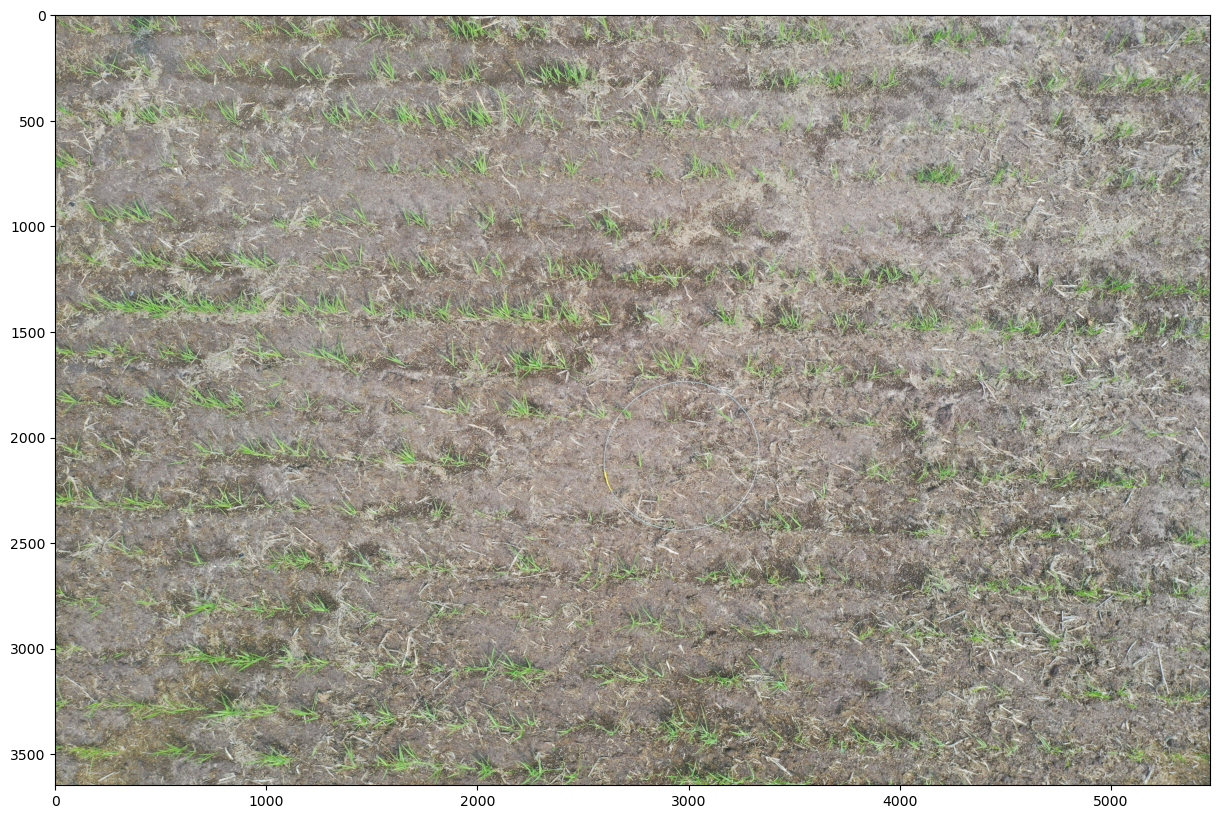

In [86]:
image = cv.imread(image_file)

im = cv.cvtColor(image, cv.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,10))
plt.imshow(im)
plt.show()

In [87]:
im.shape

(3648, 5472, 3)

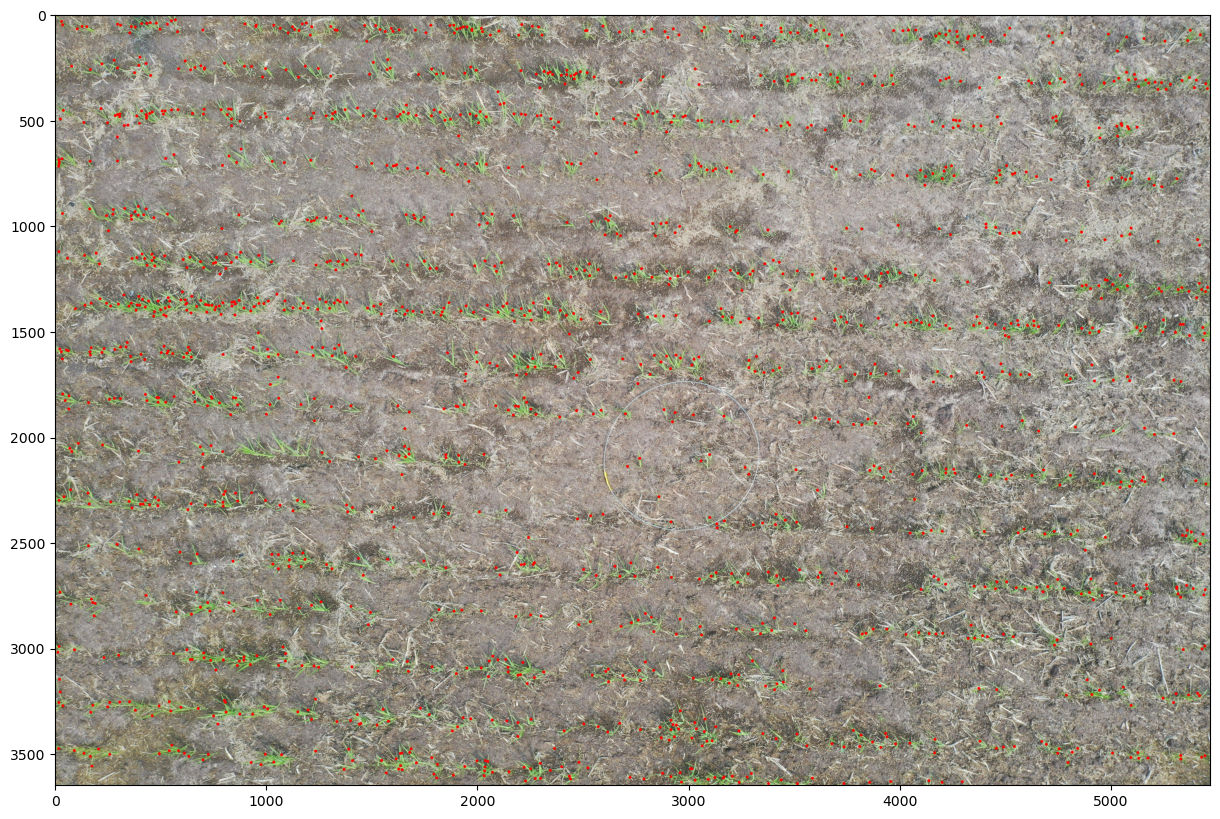

In [88]:
im_points = im.copy()
im_height, im_width, _ = im_points.shape
points = np.zeros((im_height, im_width, 3), dtype=np.uint8) #crea un fondo negro

# Draw points
for label in labels:
    x = 0
    y = 0
    for i, value in enumerate(label):
        if i == 1:
            x = round(value * im_width)
        elif i == 2:
            y = round(value * im_height)
    point = [x, y]
    cv.circle(im_points, center=point, radius=7, color=(255, 0, 0), thickness=-1)
    cv.circle(points, center=point, radius=10, color=(255, 255, 255), thickness=-1)

# Show image
fig = plt.figure(figsize=(20,10))
plt.imshow(im_points)
plt.show()

# Exportación de plano de puntos

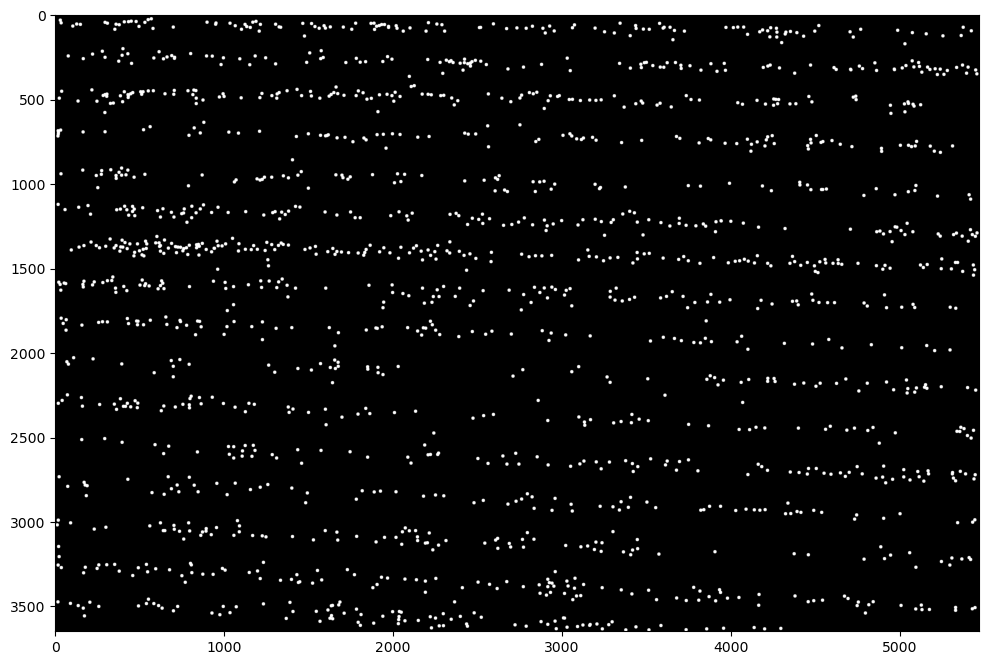

In [89]:
fig = plt.figure(figsize=(12,8))
plt.imshow(points)
plt.show()

In [90]:
# Guardar como imagen
#cv.imwrite('label_points.jpg', points)